# Multilayer Perceptron -  em construção

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Carregamento da base

In [2]:
base = pd.read_csv('../bases/iris.csv')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1

### Padronização dos dados

In [3]:
for i in range (len(base.columns)-1):
    entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)

### Transformação das classes para o tipo dummy

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)

classes_dummy = np.array(pd.get_dummies(classes))


### Plotagem dos dados (colunas 1 e 2)

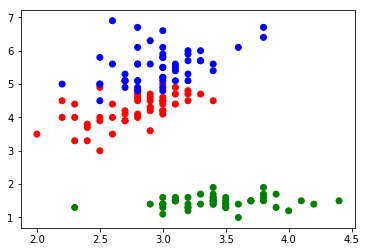

In [5]:
x = base.iloc[:,1].values
y = base.iloc[:,2].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classes]
plt.scatter(x, y, color=color)

### Divisão da base em treinamento (80%) e teste (20%)

In [6]:
entradas_trei, entradas_test, classes_trei, classes_test = train_test_split(entradas, classes_dummy, test_size=0.20)

### Métodos e demais variáveis necessárias

In [7]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

In [8]:
def funcaoAtivacao(soma):
    # Logística
    return 1/(1 + np.exp(-soma))
    # Tangente Hiperbólica
    # return (1 - np.exp(-soma)/(1 + np.exp(-soma)))

In [9]:
def derivadaParcial(camadaSaida):
    # Logística
    return camadaSaida * (1 - camadaSaida)
    # Tangente Hiperbólica
    # return 1/2 * (1 - (camadaSaida)**2)

In [10]:
epocas = 10000
NeuroniosCamadaOculta = 8
NumClasses = unique(classes) + 1
PesoBiasOculta = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta,1)))
pesos0 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NumColunas,NeuroniosCamadaOculta)))
pesos1 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta, NumClasses)))
momento = 0.9
taxaAprendOcul = 0.5
taxaAprendSai = 0.3

print('Neurônios na camada oculta '+ str(NeuroniosCamadaOculta))
print('Neurônios na camada de saída '+ str(NumClasses))

Neurônios na camada oculta 8
Neurônios na camada de saída 3


## Treinamento

### Atualização dos pesos somente após passar por todas as entradas

In [22]:
for i in range(epocas):
    camadaEntrada = entradas_trei
    # somatório da camada de entrada e camada oculta
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    # valores para a camada oculta
    camadaOculta = funcaoAtivacao(somaSinapse0 + PesoBiasOculta.T)
    # somatório da camada oculta para a camada de saída
    somaSinpase1 = np.dot(camadaOculta, pesos1)
    # valores para a camada saída
    camadaSaida = funcaoAtivacao(somaSinpase1)
        
    # cálculo do erro
    erroCamadaSaida = classes_trei - camadaSaida
    
    # Média absoluta do erro
    mediaErro = np.mean(np.abs(erroCamadaSaida))
    print("Média Absoluta do Erro: "+ str(mediaErro))
    # derivada da camada de saída
    derivadaSaida = derivadaParcial(camadaSaida)
    
    # cálculo do delta afim de encontrar a melhor combinação de pesos
    deltaSaida = erroCamadaSaida * derivadaSaida
    
    # Delta da camada oculta = derivada * peso * deltaSaida
    pesos1T = pesos1.T
    deltaSaidaPeso = deltaSaida.dot(pesos1T)
    deltaOculta = deltaSaidaPeso * derivadaParcial(camadaOculta)
    
    # BackPropagation - 
    # atualização dos pesos da camada de Saída (oculta --> saída)
    camadaOcultaT = camadaOculta.T
    pesosN1 = camadaOcultaT.dot(deltaSaida)
    pesos1 = (pesos1 * momento) + (pesosN1 * taxaAprendSai) 
    
    # Atualização dos pesos da camada oculta (entrada --> oculta)
    camadaEntradaT = camadaEntrada.T
    pesosN0 = camadaEntradaT.dot(deltaOculta)
    pesos0 = (pesos0 * momento) + (pesosN0 * taxaAprendOcul)


Média Absoluta do Erro: 0.20935606138603005
Média Absoluta do Erro: 0.19994880580320498
Média Absoluta do Erro: 0.214790576042804
Média Absoluta do Erro: 0.20369309865680207
Média Absoluta do Erro: 0.21662254509540832
Média Absoluta do Erro: 0.20527293447927064
Média Absoluta do Erro: 0.23178308123124533
Média Absoluta do Erro: 0.2108167075745138
Média Absoluta do Erro: 0.20450140942481893
Média Absoluta do Erro: 0.228752980412525
Média Absoluta do Erro: 0.2012763783042984
Média Absoluta do Erro: 0.2140724801474543
Média Absoluta do Erro: 0.2017344992908345
Média Absoluta do Erro: 0.24614744489148704
Média Absoluta do Erro: 0.20652783242705075
Média Absoluta do Erro: 0.20601011481470796
Média Absoluta do Erro: 0.19926911938532652
Média Absoluta do Erro: 0.23783596476186028
Média Absoluta do Erro: 0.2096313366314581
Média Absoluta do Erro: 0.20284084057034563
Média Absoluta do Erro: 0.2166033014653655
Média Absoluta do Erro: 0.20819792472036341
Média Absoluta do Erro: 0.2234877202770910

Média Absoluta do Erro: 0.19717535511417958
Média Absoluta do Erro: 0.22284146497869908
Média Absoluta do Erro: 0.2085993001370048
Média Absoluta do Erro: 0.20433590584781267
Média Absoluta do Erro: 0.2373763501188568
Média Absoluta do Erro: 0.20182247188147073
Média Absoluta do Erro: 0.20992384535587127
Média Absoluta do Erro: 0.2151050056598749
Média Absoluta do Erro: 0.20303282245062088
Média Absoluta do Erro: 0.22178706808094495
Média Absoluta do Erro: 0.205677392024089
Média Absoluta do Erro: 0.20805038375052512
Média Absoluta do Erro: 0.21519557022822633
Média Absoluta do Erro: 0.20413244871505531
Média Absoluta do Erro: 0.24424579890150294
Média Absoluta do Erro: 0.206604003563592
Média Absoluta do Erro: 0.2057767131906134
Média Absoluta do Erro: 0.20028008184875334
Média Absoluta do Erro: 0.2350646250735023
Média Absoluta do Erro: 0.20929700560219958
Média Absoluta do Erro: 0.20548226558593335
Média Absoluta do Erro: 0.21096464839031534
Média Absoluta do Erro: 0.211443292550310

Média Absoluta do Erro: 0.21120608518440198
Média Absoluta do Erro: 0.22022686604300518
Média Absoluta do Erro: 0.20281863925586607
Média Absoluta do Erro: 0.2538929755686199
Média Absoluta do Erro: 0.20758003817074638
Média Absoluta do Erro: 0.20695394765300368
Média Absoluta do Erro: 0.20021675542454356
Média Absoluta do Erro: 0.2272493335622227
Média Absoluta do Erro: 0.2108559369967676
Média Absoluta do Erro: 0.24582936378824047
Média Absoluta do Erro: 0.19775879842637542
Média Absoluta do Erro: 0.2161204725717322
Média Absoluta do Erro: 0.2131020122243985
Média Absoluta do Erro: 0.2193241953343637
Média Absoluta do Erro: 0.20120071544073387
Média Absoluta do Erro: 0.2572839052645941
Média Absoluta do Erro: 0.21053711772752903
Média Absoluta do Erro: 0.20481220558735858
Média Absoluta do Erro: 0.1979245466040819
Média Absoluta do Erro: 0.2244363134664182
Média Absoluta do Erro: 0.2115699281770112
Média Absoluta do Erro: 0.2469099553870086
Média Absoluta do Erro: 0.2017272235493754


Média Absoluta do Erro: 0.23191937662549283
Média Absoluta do Erro: 0.19335768630638267
Média Absoluta do Erro: 0.21073313465967303
Média Absoluta do Erro: 0.21708819280116695
Média Absoluta do Erro: 0.21248401751722087
Média Absoluta do Erro: 0.21308985647870857
Média Absoluta do Erro: 0.2161880145261511
Média Absoluta do Erro: 0.23069989300807364
Média Absoluta do Erro: 0.20047514621572635
Média Absoluta do Erro: 0.21378322056263788
Média Absoluta do Erro: 0.2054328115099293
Média Absoluta do Erro: 0.2374371731273534
Média Absoluta do Erro: 0.20223582513496818
Média Absoluta do Erro: 0.19360624059981274
Média Absoluta do Erro: 0.2294591954685643
Média Absoluta do Erro: 0.2065065002977231
Média Absoluta do Erro: 0.22411748310394158
Média Absoluta do Erro: 0.19171372937940687
Média Absoluta do Erro: 0.21127004436338861
Média Absoluta do Erro: 0.2286453644067978
Média Absoluta do Erro: 0.19828719616620988
Média Absoluta do Erro: 0.22138378100069953
Média Absoluta do Erro: 0.209696552522

Média Absoluta do Erro: 0.2089832156451921
Média Absoluta do Erro: 0.2305701945655769
Média Absoluta do Erro: 0.1993829369853998
Média Absoluta do Erro: 0.21400236132562042
Média Absoluta do Erro: 0.23398757686058053
Média Absoluta do Erro: 0.1958010604375982
Média Absoluta do Erro: 0.20318236633177783
Média Absoluta do Erro: 0.21219327402171256
Média Absoluta do Erro: 0.23834691760565513
Média Absoluta do Erro: 0.2019358128297509
Média Absoluta do Erro: 0.1941197828102763
Média Absoluta do Erro: 0.24491180326450832
Média Absoluta do Erro: 0.21169019095071168
Média Absoluta do Erro: 0.1968876136161032
Média Absoluta do Erro: 0.20192715766736372
Média Absoluta do Erro: 0.2066283584566533
Média Absoluta do Erro: 0.23695506093592758
Média Absoluta do Erro: 0.21048460973633507
Média Absoluta do Erro: 0.2039303784013468
Média Absoluta do Erro: 0.23398063848093445
Média Absoluta do Erro: 0.20472435097264297
Média Absoluta do Erro: 0.20851336395496617
Média Absoluta do Erro: 0.212846465687736

Média Absoluta do Erro: 0.21163188886181852
Média Absoluta do Erro: 0.2042795150919578
Média Absoluta do Erro: 0.23680129385334447
Média Absoluta do Erro: 0.2043047699608714
Média Absoluta do Erro: 0.1963524869197545
Média Absoluta do Erro: 0.24129039894874119
Média Absoluta do Erro: 0.2095569400961618
Média Absoluta do Erro: 0.19693149993750375
Média Absoluta do Erro: 0.218306736138625
Média Absoluta do Erro: 0.2040691393263265
Média Absoluta do Erro: 0.20616603674516962
Média Absoluta do Erro: 0.2315090097135264
Média Absoluta do Erro: 0.20537673548737037
Média Absoluta do Erro: 0.2136981620617976
Média Absoluta do Erro: 0.21677685692665172
Média Absoluta do Erro: 0.21189132452232834
Média Absoluta do Erro: 0.22185628251652567
Média Absoluta do Erro: 0.20321923770472747
Média Absoluta do Erro: 0.2304749268335746
Média Absoluta do Erro: 0.21153670148767728
Média Absoluta do Erro: 0.20930531724951418
Média Absoluta do Erro: 0.22081074605756446
Média Absoluta do Erro: 0.1988512933820382

Média Absoluta do Erro: 0.19951044883354185
Média Absoluta do Erro: 0.22074686655137934
Média Absoluta do Erro: 0.21488629992688374
Média Absoluta do Erro: 0.2229416800324172
Média Absoluta do Erro: 0.1930574410363265
Média Absoluta do Erro: 0.22209934232511877
Média Absoluta do Erro: 0.22183707964953112
Média Absoluta do Erro: 0.21454277497423113
Média Absoluta do Erro: 0.19825284729275314
Média Absoluta do Erro: 0.26256314507430123
Média Absoluta do Erro: 0.21536365982103484
Média Absoluta do Erro: 0.2009792331934728
Média Absoluta do Erro: 0.19673128517007962
Média Absoluta do Erro: 0.20981378658822933
Média Absoluta do Erro: 0.226234691492982
Média Absoluta do Erro: 0.21465064416905572
Média Absoluta do Erro: 0.23006588352228238
Média Absoluta do Erro: 0.20019400027114437
Média Absoluta do Erro: 0.23559351359554923
Média Absoluta do Erro: 0.20862540817868488
Média Absoluta do Erro: 0.2060228421140548
Média Absoluta do Erro: 0.21706538766386874
Média Absoluta do Erro: 0.231289357122

Média Absoluta do Erro: 0.2048795656935234
Média Absoluta do Erro: 0.22874155887130232
Média Absoluta do Erro: 0.20090351030934436
Média Absoluta do Erro: 0.2115642683961638
Média Absoluta do Erro: 0.21195513203437719
Média Absoluta do Erro: 0.2154070722969332
Média Absoluta do Erro: 0.21576551683667414
Média Absoluta do Erro: 0.21531728508224124
Média Absoluta do Erro: 0.20721794813618327
Média Absoluta do Erro: 0.24167486717416137
Média Absoluta do Erro: 0.20970893822666722
Média Absoluta do Erro: 0.20360587011034723
Média Absoluta do Erro: 0.23027506138991274
Média Absoluta do Erro: 0.20985151773493516
Média Absoluta do Erro: 0.2072379795297251
Média Absoluta do Erro: 0.2204896729152475
Média Absoluta do Erro: 0.19723730827787053
Média Absoluta do Erro: 0.25037669990545064
Média Absoluta do Erro: 0.20984186228800128
Média Absoluta do Erro: 0.20327607879304338
Média Absoluta do Erro: 0.1966829345320809
Média Absoluta do Erro: 0.23413858514568248
Média Absoluta do Erro: 0.209487358075

Média Absoluta do Erro: 0.22063734761670548
Média Absoluta do Erro: 0.20946553778669133
Média Absoluta do Erro: 0.23360606583604213
Média Absoluta do Erro: 0.19404897724683173
Média Absoluta do Erro: 0.21144842599020983
Média Absoluta do Erro: 0.21334897045496745
Média Absoluta do Erro: 0.2183524734366464
Média Absoluta do Erro: 0.20238831881805414
Média Absoluta do Erro: 0.24600779844239987
Média Absoluta do Erro: 0.2112408393727964
Média Absoluta do Erro: 0.19976251350673407
Média Absoluta do Erro: 0.2002638195546964
Média Absoluta do Erro: 0.2154004027576471
Média Absoluta do Erro: 0.21797801843527423
Média Absoluta do Erro: 0.21508968397783532
Média Absoluta do Erro: 0.21498329373403852
Média Absoluta do Erro: 0.21695009081279604
Média Absoluta do Erro: 0.2254508976336619
Média Absoluta do Erro: 0.20260077592009476
Média Absoluta do Erro: 0.23785260358710245
Média Absoluta do Erro: 0.20973592070550962
Média Absoluta do Erro: 0.2070996541297259
Média Absoluta do Erro: 0.208307434996

Média Absoluta do Erro: 0.1966597353246659
Média Absoluta do Erro: 0.22596009347017265
Média Absoluta do Erro: 0.2093737150721611
Média Absoluta do Erro: 0.23897821159998525
Média Absoluta do Erro: 0.1997477159823682
Média Absoluta do Erro: 0.21348441524515485
Média Absoluta do Erro: 0.21437837937545112
Média Absoluta do Erro: 0.21595118102395652
Média Absoluta do Erro: 0.19735934762645124
Média Absoluta do Erro: 0.24462684580003338
Média Absoluta do Erro: 0.21126842489809777
Média Absoluta do Erro: 0.19751274615745398
Média Absoluta do Erro: 0.20893771336871694
Média Absoluta do Erro: 0.201147854683296
Média Absoluta do Erro: 0.2381555762719526
Média Absoluta do Erro: 0.21367853516688728
Média Absoluta do Erro: 0.20828389898026692
Média Absoluta do Erro: 0.21246346985684497
Média Absoluta do Erro: 0.21214116961872462
Média Absoluta do Erro: 0.21854000872934493
Média Absoluta do Erro: 0.2118968028782178
Média Absoluta do Erro: 0.23388004849558652
Média Absoluta do Erro: 0.1965164076047

Média Absoluta do Erro: 0.21089027811450975
Média Absoluta do Erro: 0.2322688128699339
Média Absoluta do Erro: 0.19553081054092586
Média Absoluta do Erro: 0.20330688167691602
Média Absoluta do Erro: 0.2096646275023391
Média Absoluta do Erro: 0.23633790013214373
Média Absoluta do Erro: 0.20257300581246662
Média Absoluta do Erro: 0.1965536752856844
Média Absoluta do Erro: 0.23968042755452312
Média Absoluta do Erro: 0.2112442305189858
Média Absoluta do Erro: 0.19782739242589523
Média Absoluta do Erro: 0.21664307241454184
Média Absoluta do Erro: 0.20235218195554056
Média Absoluta do Erro: 0.2078308811813226
Média Absoluta do Erro: 0.22573806142854064
Média Absoluta do Erro: 0.20911780528866863
Média Absoluta do Erro: 0.24183931831042177
Média Absoluta do Erro: 0.20291409831975737
Média Absoluta do Erro: 0.21181128976912045
Média Absoluta do Erro: 0.21016018398495512
Média Absoluta do Erro: 0.22186878158785614
Média Absoluta do Erro: 0.1985226773638287
Média Absoluta do Erro: 0.227213803372

Média Absoluta do Erro: 0.22361020024314363
Média Absoluta do Erro: 0.1991673964296119
Média Absoluta do Erro: 0.21875075421336374
Média Absoluta do Erro: 0.2105350491461577
Média Absoluta do Erro: 0.2315154348960373
Média Absoluta do Erro: 0.19815669699490945
Média Absoluta do Erro: 0.21054665323942562
Média Absoluta do Erro: 0.2330774341196572
Média Absoluta do Erro: 0.2009520324139978
Média Absoluta do Erro: 0.19818538720791226
Média Absoluta do Erro: 0.23755113023193344
Média Absoluta do Erro: 0.20879809225433893
Média Absoluta do Erro: 0.20093336538198645
Média Absoluta do Erro: 0.21960675209252567
Média Absoluta do Erro: 0.20576922823955957
Média Absoluta do Erro: 0.20973000211983658
Média Absoluta do Erro: 0.223487865269285
Média Absoluta do Erro: 0.20083486242823767
Média Absoluta do Erro: 0.23218063243747922
Média Absoluta do Erro: 0.20823105064055317
Média Absoluta do Erro: 0.22622361420104195
Média Absoluta do Erro: 0.194119863192653
Média Absoluta do Erro: 0.213348083105439

Média Absoluta do Erro: 0.2111172613030269
Média Absoluta do Erro: 0.22430867921617167
Média Absoluta do Erro: 0.20077755194873248
Média Absoluta do Erro: 0.22904878891554364
Média Absoluta do Erro: 0.208307283674879
Média Absoluta do Erro: 0.236888984191749
Média Absoluta do Erro: 0.1948217076383925
Média Absoluta do Erro: 0.21320140821507327
Média Absoluta do Erro: 0.2120627000826645
Média Absoluta do Erro: 0.2257474824764656
Média Absoluta do Erro: 0.20107913306272873
Média Absoluta do Erro: 0.22660957889432523
Média Absoluta do Erro: 0.20948967247475955
Média Absoluta do Erro: 0.243255855642924
Média Absoluta do Erro: 0.19689353173971272
Média Absoluta do Erro: 0.2146666347426551
Média Absoluta do Erro: 0.2119368551980071
Média Absoluta do Erro: 0.21981939394793
Média Absoluta do Erro: 0.19890427568951216
Média Absoluta do Erro: 0.2552109875399668
Média Absoluta do Erro: 0.21052214036928993
Média Absoluta do Erro: 0.20421785680165824
Média Absoluta do Erro: 0.19681740913778867
Médi

Média Absoluta do Erro: 0.2287698870894547
Média Absoluta do Erro: 0.1974067508565382
Média Absoluta do Erro: 0.21589340479985725
Média Absoluta do Erro: 0.20548761996346415
Média Absoluta do Erro: 0.22673104005406916
Média Absoluta do Erro: 0.20099016466583539
Média Absoluta do Erro: 0.20400661195134384
Média Absoluta do Erro: 0.21427979224952493
Média Absoluta do Erro: 0.2173616023425414
Média Absoluta do Erro: 0.20552789826518025
Média Absoluta do Erro: 0.21664956499395993
Média Absoluta do Erro: 0.20847366458278277
Média Absoluta do Erro: 0.2329528446173978
Média Absoluta do Erro: 0.19957177206851145
Média Absoluta do Erro: 0.19452890394915862
Média Absoluta do Erro: 0.24201396103913259
Média Absoluta do Erro: 0.21036778018164967
Média Absoluta do Erro: 0.19958907499263262
Média Absoluta do Erro: 0.2080247946239196
Média Absoluta do Erro: 0.2033180992317086
Média Absoluta do Erro: 0.24265889603198718
Média Absoluta do Erro: 0.20643133165722002
Média Absoluta do Erro: 0.199659854924

Média Absoluta do Erro: 0.213041152984793
Média Absoluta do Erro: 0.20875868539932518
Média Absoluta do Erro: 0.2139079396340898
Média Absoluta do Erro: 0.21935155109872373
Média Absoluta do Erro: 0.20700569945071612
Média Absoluta do Erro: 0.23231351211457243
Média Absoluta do Erro: 0.2066722175004712
Média Absoluta do Erro: 0.20372736149512838
Média Absoluta do Erro: 0.23851560457853502
Média Absoluta do Erro: 0.20718288952979333
Média Absoluta do Erro: 0.2038331776898526
Média Absoluta do Erro: 0.22483289507395088
Média Absoluta do Erro: 0.2069825146903918
Média Absoluta do Erro: 0.20748015652696283
Média Absoluta do Erro: 0.22777421701995135
Média Absoluta do Erro: 0.19851087737056866
Média Absoluta do Erro: 0.2158600615474445
Média Absoluta do Erro: 0.22787275360854736
Média Absoluta do Erro: 0.19565870486517728
Média Absoluta do Erro: 0.22136780446773735
Média Absoluta do Erro: 0.20930278421018436
Média Absoluta do Erro: 0.20637816556419283
Média Absoluta do Erro: 0.2375215102103

Média Absoluta do Erro: 0.21542314067646137
Média Absoluta do Erro: 0.2132590530973896
Média Absoluta do Erro: 0.2418530047527348
Média Absoluta do Erro: 0.2005474668946872
Média Absoluta do Erro: 0.1946661903501159
Média Absoluta do Erro: 0.23730172090858026
Média Absoluta do Erro: 0.211152556770642
Média Absoluta do Erro: 0.20633796294513695
Média Absoluta do Erro: 0.20277065412296771
Média Absoluta do Erro: 0.22044344135194216
Média Absoluta do Erro: 0.21377545476531176
Média Absoluta do Erro: 0.24520669192189454
Média Absoluta do Erro: 0.20331469617816544
Média Absoluta do Erro: 0.21577420806626024
Média Absoluta do Erro: 0.2126307835808828
Média Absoluta do Erro: 0.22781888603256908
Média Absoluta do Erro: 0.200574788968355
Média Absoluta do Erro: 0.22600846592469823
Média Absoluta do Erro: 0.2049921110820435
Média Absoluta do Erro: 0.2464961494873507
Média Absoluta do Erro: 0.20123955248822795
Média Absoluta do Erro: 0.2136944688865799
Média Absoluta do Erro: 0.2090927482482465
M

Média Absoluta do Erro: 0.20025493228877017
Média Absoluta do Erro: 0.22736866408287848
Média Absoluta do Erro: 0.21077411737130258
Média Absoluta do Erro: 0.20546657370975935
Média Absoluta do Erro: 0.22623920337294004
Média Absoluta do Erro: 0.20109301081245468
Média Absoluta do Erro: 0.23336548090845805
Média Absoluta do Erro: 0.2032876314830383
Média Absoluta do Erro: 0.20693391314523626
Média Absoluta do Erro: 0.22332499586528257
Média Absoluta do Erro: 0.20525654579978903
Média Absoluta do Erro: 0.21679318883142484
Média Absoluta do Erro: 0.20455917087080505
Média Absoluta do Erro: 0.23721388926147252
Média Absoluta do Erro: 0.21058204451206386
Média Absoluta do Erro: 0.2046593586241722
Média Absoluta do Erro: 0.21099278480114816
Média Absoluta do Erro: 0.21844517964173832
Média Absoluta do Erro: 0.2007701650146253
Média Absoluta do Erro: 0.22728899359639618
Média Absoluta do Erro: 0.20661692639386306
Média Absoluta do Erro: 0.20335069184805946
Média Absoluta do Erro: 0.235538835

Média Absoluta do Erro: 0.23766739608066786
Média Absoluta do Erro: 0.2101825263061291
Média Absoluta do Erro: 0.20911124816410193
Média Absoluta do Erro: 0.1948377383696189
Média Absoluta do Erro: 0.24486760947546182
Média Absoluta do Erro: 0.21066808739676002
Média Absoluta do Erro: 0.206602065486688
Média Absoluta do Erro: 0.20336407114996266
Média Absoluta do Erro: 0.23806491383048253
Média Absoluta do Erro: 0.21475931826699485
Média Absoluta do Erro: 0.21157341041154712
Média Absoluta do Erro: 0.20073336514251286
Média Absoluta do Erro: 0.24091043790436567
Média Absoluta do Erro: 0.21113348885365057
Média Absoluta do Erro: 0.20042226545963468
Média Absoluta do Erro: 0.22777056571209614
Média Absoluta do Erro: 0.20956731187676764
Média Absoluta do Erro: 0.20762853789219243
Média Absoluta do Erro: 0.22811509928668344
Média Absoluta do Erro: 0.2047409493787837
Média Absoluta do Erro: 0.2397528133433955
Média Absoluta do Erro: 0.20386335317648122
Média Absoluta do Erro: 0.209485075093

Média Absoluta do Erro: 0.1993121313217799
Média Absoluta do Erro: 0.19718569722912577
Média Absoluta do Erro: 0.24142779718467247
Média Absoluta do Erro: 0.2151871976118747
Média Absoluta do Erro: 0.20212588692820788
Média Absoluta do Erro: 0.21802031181500917
Média Absoluta do Erro: 0.2020922357501192
Média Absoluta do Erro: 0.21172668158833222
Média Absoluta do Erro: 0.2193165443156924
Média Absoluta do Erro: 0.2220591543293897
Média Absoluta do Erro: 0.2089121425496752
Média Absoluta do Erro: 0.21813591448423778
Média Absoluta do Erro: 0.20877504831075566
Média Absoluta do Erro: 0.23944048690362843
Média Absoluta do Erro: 0.19922419870008043
Média Absoluta do Erro: 0.19210013835162074
Média Absoluta do Erro: 0.23619219366450986
Média Absoluta do Erro: 0.20853635285781608
Média Absoluta do Erro: 0.20200957862989125
Média Absoluta do Erro: 0.20711451776316633
Média Absoluta do Erro: 0.20586714471426562
Média Absoluta do Erro: 0.24406714276696231
Média Absoluta do Erro: 0.208327068250

### Organização das Saídas para plotagem da Matriz de Confusão

In [23]:
classesN = [np.argmax(t) for t in classes_trei]

print(classesN)

[2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0]


In [24]:
SaidasCalcTrein =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTrein)

[2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

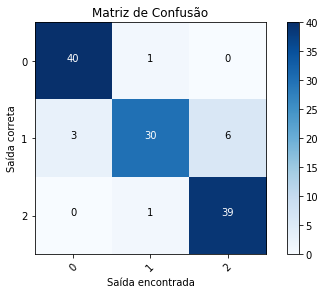

In [26]:
cm = confusion_matrix(classesN, SaidasCalcTrein)
plot_confusion_matrix(cm, 
                      classes=['0', '1', '2'],
                      title='Matriz de Confusão')

## Testes

In [27]:
camadaEntrada = entradas_test
# somatório da camada de entrada e camada oculta
somaSinapse0 = np.dot(camadaEntrada, pesos0)
# valores para a camada oculta
camadaOculta = funcaoAtivacao(somaSinapse0)
# somatório da camada oculta para a camada de saída
somaSinpase1 = np.dot(camadaOculta, pesos1)
# valores para a camada saída
camadaSaida = funcaoAtivacao(somaSinpase1)

# cálculo do erro
erroCamadaSaida = classes_test - camadaSaida
    
# Média absoluta do erro
mediaErro = np.mean(np.abs(erroCamadaSaida))
print("Média Absoluta do Erro: "+ str(mediaErro))

Média Absoluta do Erro: 0.2212929217849084


### Organização das Saídas para plotagem da Matriz de Confusão

In [28]:
classesN = [np.argmax(t) for t in classes_test]

print(classesN)

[2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0]


In [29]:
SaidasCalcTest =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTest)

[2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0]


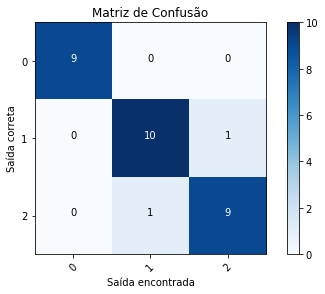

In [30]:
cm = confusion_matrix(classesN, SaidasCalcTest)
plot_confusion_matrix(cm, 
                      classes=['0', '1', '2'],
                      title='Matriz de Confusão')